### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### Import Dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Combine train and test data
df = pd.concat([train_data, test_data], ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocessing

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Split train and test data
train_data = df.iloc[:len(train_data)]
test_data = df.iloc[len(train_data):]

# Features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model

In [4]:
# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Interpretation using Shap Values

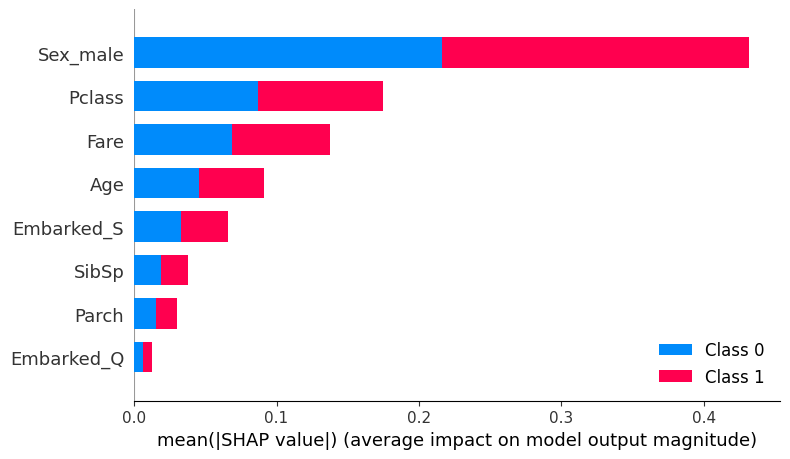

In [5]:
# Calculate Shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid)

# Visualize summary plot for all instances
shap.summary_plot(shap_values, X_valid, feature_names=features)

##### Summarize the significance of Shap values
- Shap values provide a way to understand the impact of each feature on a model's prediction for a specific instance.
- They help interpret complex models by showing the contribution of each feature to the predicted outcome.